# Projet 4 

## Description 

Étude de la mal nutrition dans le monde à partir de 4 fichiers csv contenant des données de 2013 à 2017.

La premiere partie de cette étude est concacré à l'année 2017


In [126]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns  

In [127]:
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')
sous_nutrition = pd.read_csv('sous_nutrition.csv')
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv')
population = pd.read_csv('population.csv')

In [170]:
#display(aide_alimentaire.head())
#display(sous_nutrition.head())
display(dispo_alimentaire.head())
#display(population.head())



,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


On a fait le choix de prendre 0.1 million de personne en sous nutrition pour les pays <0.1

In [129]:
sous_nutrition.loc[sous_nutrition['Valeur'] == '<0.1', 'Valeur'] = '0.1'


Transformation du type de la colonne Valeur, anciennement de type Objet, maintenant float

In [130]:
sous_nutrition['Valeur'] = sous_nutrition["Valeur"].astype(float)
sous_nutrition['Valeur'].dtype

dtype('float64')

In [131]:
sous_nutrition["Valeur"].fillna(value=0, inplace=True)
sous_nutrition.dtypes

Zone       object
Année      object
Valeur    float64
dtype: object

In [132]:
sous_nutrition_2017 = sous_nutrition.loc[(sous_nutrition['Année']=='2016-2018'),:]
total_sous_nutrition_2017 = sous_nutrition_2017['Valeur'].sum()
total_sous_nutrition_2017


537.7

On voit qu'il y a 537.7 million de personnes victimes de sous nutrition en 2017

In [133]:
population_2017 = round(population.loc[population['Année']== 2017 ,'Valeur'].sum(),) * 1000
population_2017

7548134000

La population en 2017 était de 7.5 milliards 

In [134]:
proportion_malnutrition_2017 = round((total_sous_nutrition_2017 * 1000000) / population_2017,3)
proportion_malnutrition_2017

0.071

En 2017, 7% de la population était en sous nutrition

In [135]:
dispoAlimMondial = pd.merge(dispo_alimentaire[["Zone","Disponibilité alimentaire (Kcal/personne/jour)"]],population.loc[population["Année"]==2017,["Zone","Valeur"]],how='left',on='Zone')
dispoAlimMondial["dispo_Kcal"] = dispoAlimMondial["Disponibilité alimentaire (Kcal/personne/jour)"] * dispoAlimMondial["Valeur"] * 365


Il faut en moyenne 2500Kcal/personne/jour 

In [136]:
dispoAlimMondial = pd.merge(dispo_alimentaire[["Zone","Disponibilité alimentaire (Kcal/personne/jour)","Origine"]],population.loc[population["Année"]==2017,["Zone","Valeur"]],how='left',on='Zone')
dispoAlimMondial["dispo_Kcal"] = dispoAlimMondial["Disponibilité alimentaire (Kcal/personne/jour)"] * dispoAlimMondial["Valeur"] * 365
totalKcalHumain = round((dispoAlimMondial["dispo_Kcal"].sum()*1000)/(2500*365),)
print(totalKcalHumain,"humains peuvent etre nourris")
propTotalKcalHumain = round((totalKcalHumain*100)/ (population_2017),1)
print("soit une proportion de ",propTotalKcalHumain,"%")


8367593851 humains peuvent etre nourris
soit une proportion de  110.9 %


In [137]:
dispoAlimMondialVege = dispoAlimMondial.loc[dispoAlimMondial["Origine"]=="vegetale"]
totalKcalHumainVege = round((dispoAlimMondialVege["dispo_Kcal"].sum()*1000)/(2500*365),)
print(totalKcalHumainVege,"humains peuvent etre nourris avec de la nourriture vegetal")
propTotalKcalHumainVege = round((totalKcalHumainVege*100)/ (population_2017),1)
print("soit une proportion de ",propTotalKcalHumainVege,"%")

6904305685 humains peuvent etre nourris avec de la nourriture vegetal
soit une proportion de  91.5 %


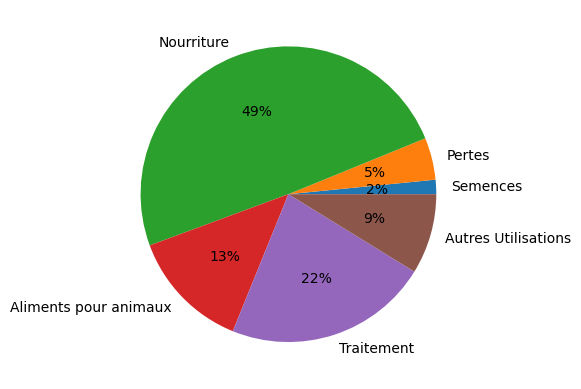

In [141]:
liste = ['Semences','Pertes','Nourriture','Aliments pour animaux',"Traitement","Autres Utilisations"]
liste2 = []
for variable in liste:
    a = dispo_alimentaire[variable].sum()
    liste2.append(a)
df1 = pd.DataFrame(liste2, index=liste, columns=["Totaux1"])
graphPie1 = plt.pyplot.pie(x=df1["Totaux1"], labels=liste, autopct='%.0f%%')



In [155]:
sousNutrition2017 = sous_nutrition.loc[sous_nutrition['Année']=='2016-2018',:]
sousNutrition2017.rename(columns={'Valeur' : 'Population sous alimenté'}, inplace=True)
popu2017 = population.loc[population["Année"]==2017,["Zone","Valeur"]]
popu2017.rename(columns={'Valeur' : "Population"}, inplace=True)


proportionSousAlimentées = pd.merge(sousNutrition2017, popu2017, on="Zone",how="left")
proportionSousAlimentées["Population sous alimenté"] = (proportionSousAlimentées["Population sous alimenté"])*1000000
proportionSousAlimentées["Population"] = proportionSousAlimentées["Population"] * 1000
proportionSousAlimentées['Proportion'] = round((proportionSousAlimentées["Population sous alimenté"]) / (proportionSousAlimentées["Population"]),3)
proportionSousAlimentées.sort_values("Proportion", ascending=False)


/var/folders/9z/twqnyxm936n71h0b6v7yr8vh0000gn/T/ipykernel_72101/1784069596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sousNutrition2017.rename(columns={'Valeur' : 'Population sous alimenté'}, inplace=True)


,Zone,Année,Population sous alimenté,Population,Proportion
51,Dominique,2016-2018,100000.0,71458.0,1.399
164,Saint-Vincent-et-les Grenadines,2016-2018,100000.0,109827.0,0.911
98,Kiribati,2016-2018,100000.0,114158.0,0.876
167,Sao Tomé-et-Principe,2016-2018,100000.0,207089.0,0.483
78,Haïti,2016-2018,5300000.0,10982366.0,0.483
...,...,...,...,...,...
75,Guinée équatoriale,2016-2018,0.0,1262002.0,0.000
74,Guinée,2016-2018,0.0,12067519.0,0.000
72,Groenland,2016-2018,0.0,56481.0,0.000
71,Grenade,2016-2018,0.0,110874.0,0.000


In [139]:

aide = aide_alimentaire[["Pays bénéficiaire", "Valeur"]].groupby(["Pays bénéficiaire"]).sum()
aide.sort_values("Valeur", ascending=False).head()



,Valeur
Pays bénéficiaire,
République arabe syrienne,1858943
Éthiopie,1381294
Yémen,1206484
Soudan du Sud,695248
Soudan,669784


In [140]:
dispoAlimentaire2013 = dispo_alimentaire.groupby(["Zone"]).sum("Disponibilité alimentaire (Kcal/personne/jour)")
dispoAlimentaire2013 = dispoAlimentaire2013[["Disponibilité alimentaire (Kcal/personne/jour)"]]
dispoAlimentaire2013 = dispoAlimentaire2013.sort_values("Disponibilité alimentaire (Kcal/personne/jour)", ascending=False)
popu2013 = population.loc[population["Année"]==2013,["Zone","Valeur"]]
dispHabitant = pd.merge(dispoAlimentaire2013, popu2013, on='Zone', how='left')
dispHabitant.rename(columns={'Valeur' : "Population (en millier d'habitants)"})

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Population (en millier d'habitants)
0,Autriche,3770.0,8556.189
1,Belgique,3737.0,11154.009
2,Turquie,3708.0,75925.462
3,États-Unis d'Amérique,3682.0,316400.538
4,Israël,3610.0,7734.841
...,...,...,...
169,Haïti,2089.0,10400.675
170,Afghanistan,2087.0,32269.589
171,Madagascar,2056.0,22961.255
172,Zambie,1924.0,14926.544


In [168]:
aide_alimentaire.loc[aide_alimentaire["Année"]==2016].groupby(["Produit","Année"]).sum([["Valeur"]])

,,Valeur
Produit,Année,
Autres non-céréales,2016,7572
Blé et Farin,2016,190760
BulgurFarEnt,2016,12125
Céréales,2016,285349
Céréales Secondaires,2016,1178
"Fruits secs, total",2016,2044
Huiles végétales,2016,14225
"Lait, total",2016,775
"Légumineuses Sèches,Tot.",2016,50279


In [259]:
dispo_alimentaire.loc[dispo_alimentaire["Produit"]=="Sésame",:]

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
51,Afghanistan,Sésame,vegetale,NaN,NaN,9.0,0.52,0.77,0.27,21.0,11.0,NaN,16.0,1.0,32.0,1.0,4.0,0.0
145,Afrique du Sud,Sésame,vegetale,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN
237,Albanie,Sésame,vegetale,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
330,Algérie,Sésame,vegetale,NaN,NaN,2.0,0.12,0.16,0.06,5.0,NaN,5.0,5.0,NaN,NaN,NaN,NaN,0.0
425,Allemagne,Sésame,vegetale,NaN,NaN,NaN,NaN,NaN,NaN,26.0,4.0,31.0,NaN,1.0,NaN,NaN,26.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15235,Émirats arabes unis,Sésame,vegetale,NaN,0.0,10.0,0.62,0.84,0.30,6.0,2.0,7.0,6.0,NaN,NaN,NaN,NaN,0.0
15330,Équateur,Sésame,vegetale,NaN,NaN,0.0,0.01,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
15425,États-Unis d'Amérique,Sésame,vegetale,NaN,NaN,2.0,0.10,0.13,0.05,32.0,2.0,34.0,31.0,2.0,0.0,NaN,NaN,NaN
15517,Éthiopie,Sésame,vegetale,NaN,NaN,2.0,0.11,0.15,0.05,12.0,175.0,0.0,10.0,NaN,187.0,2.0,NaN,0.0


In [253]:
FaoCereal = pd.read_csv("FaoCereal.csv")
ListeCereal = FaoCereal.iloc[:,7]
ListeCereal = ListeCereal.unique()
ListeCereal = ListeCereal.tolist()
ListeCereal



['Blé et produits',
 'Riz et produits',
 'Orge et produits',
 'Maïs et produits',
 'Seigle et produits',
 'Millet et produits',
 'Céréales, Autres',
 'Avoine',
 'Sorgho et produits']

In [249]:
for mot in ListeCereal :
    if mot[len(mot)-11:] == "et produits":
        ListeCereal.remove(mot)
        ListeCereal.append(mot[:len(mot)-12])
print(ListeCereal)

['Céréales, Autres', 'Avoine', 'Blé', 'Orge', 'Seigle', 'Sorgho', 'Riz', 'Millet', 'Maïs']


In [252]:
FaoCereal[["Zone","Élément","Produit","Valeur"]]

,Zone,Élément,Produit,Valeur
0,Afghanistan,Aliments pour animaux,Blé et produits,326
1,Afghanistan,Nourriture,Blé et produits,5215
2,Afghanistan,Aliments pour animaux,Riz et produits,9
3,Afghanistan,Nourriture,Riz et produits,620
4,Afghanistan,Aliments pour animaux,Orge et produits,360
...,...,...,...,...
2601,Zimbabwe,Nourriture,Millet et produits,28
2602,Zimbabwe,Aliments pour animaux,Sorgho et produits,1
2603,Zimbabwe,Nourriture,Sorgho et produits,49
2604,Zimbabwe,Aliments pour animaux,"Céréales, Autres",0


In [263]:
FaoLegum = pd.read_csv("FaoLegum.csv")
FaoLegum.iloc[:,7].unique()

array(['Légumineuses Autres et produits', 'Haricots', 'Pois'],
      dtype=object)

In [264]:
Oleagineu = pd.read_csv("Oleagineu.csv")
Oleagineu.iloc[:,7].unique()

array(['Graines de tournesol', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Soja',
       'Arachides', 'Graines Colza/Moutarde', 'Palmistes'], dtype=object)